In [189]:
directory = '/storage/experiments/2024/01_AIRDOS04_PRG-GVA_GVA-PRG/bak' # Directory with data 

FIRST_CHANNEL = 8 # a column of the 1st channel without noise
ZERO_CHANNEL = 4 # a column of the channel with maximal noise
CH_WIDTH = 0.0078 # [MeV]

In [169]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import glob
import matplotlib.pyplot as plt
import matplotlib
import re

In [190]:
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

df=pd.DataFrame()

sn = '0'
files = sorted(glob.iglob(directory + '/*.TXT'), key=numericalSort)
for file in files:
    print(file)
    l=[]
    l.extend(range(0,1028))
    f = pd.read_csv(file, sep=',', header=None, names=l, comment='*', low_memory=False)
    try:
        sn = f.loc[f[0]=='$DOS'].iloc[0,6]
        print("S.N.: ", sn)
    except:
        pass
    df = pd.concat([df,f], ignore_index=True)

#df = df.reset_index(drop=True)
print('All files was readed.')

/storage/experiments/2024/01_AIRDOS04_PRG-GVA_GVA-PRG/bak/3.TXT
S.N.:  ffffffffffffffffffffffffffffffff
/storage/experiments/2024/01_AIRDOS04_PRG-GVA_GVA-PRG/bak/4.TXT
S.N.:  ffffffffffffffffffffffffffffffff
/storage/experiments/2024/01_AIRDOS04_PRG-GVA_GVA-PRG/bak/5.TXT
/storage/experiments/2024/01_AIRDOS04_PRG-GVA_GVA-PRG/bak/6.TXT
/storage/experiments/2024/01_AIRDOS04_PRG-GVA_GVA-PRG/bak/7.TXT
All files was readed.


In [191]:
run = 0
df['run'] = np.nan
df = df.loc[df[0]=='$HIST'].copy()
df[2] = pd.to_numeric(df[2], errors='coerce')

try:
    for x in df.loc[df[2]<20].index:
        df.loc[x,'run'] = run
        run += 1
except:
    pass
df['run'].fillna(method="ffill", inplace=True)


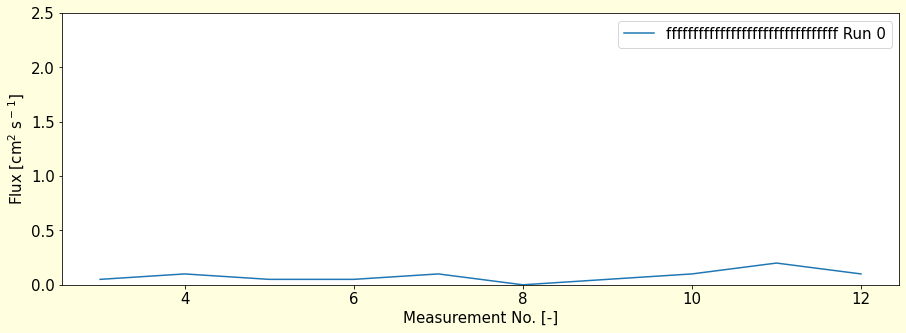

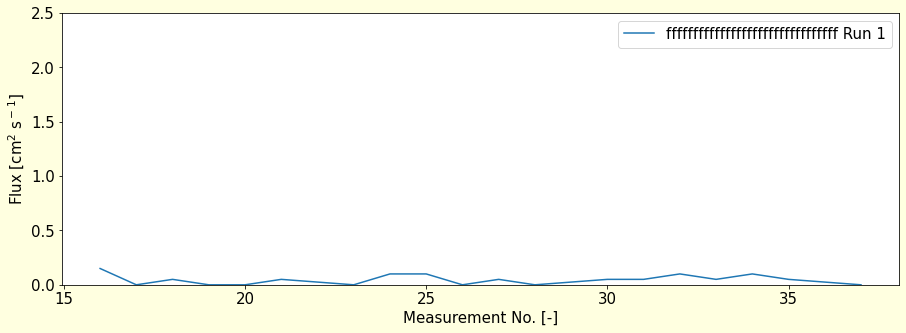

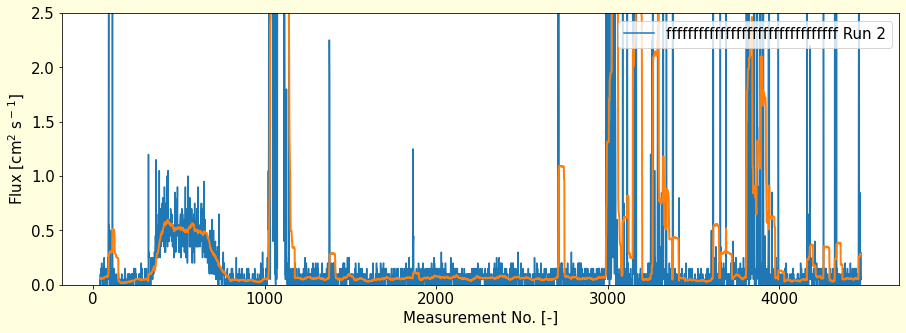

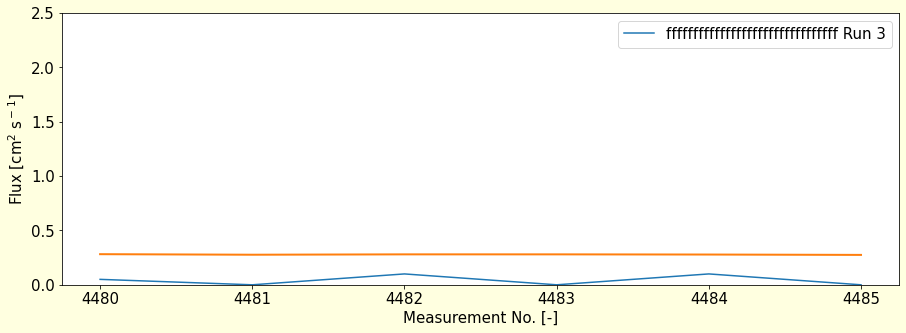

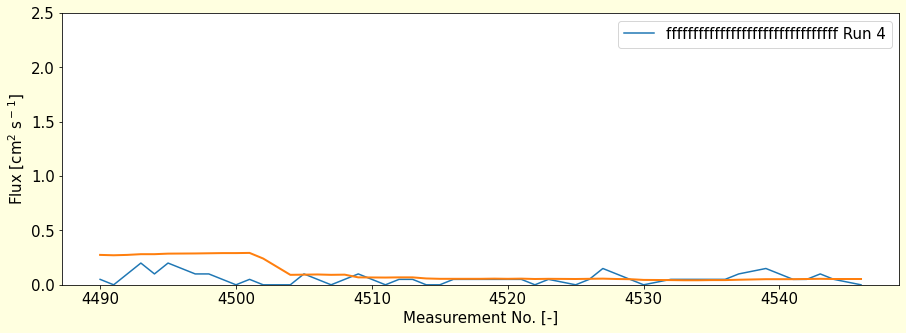

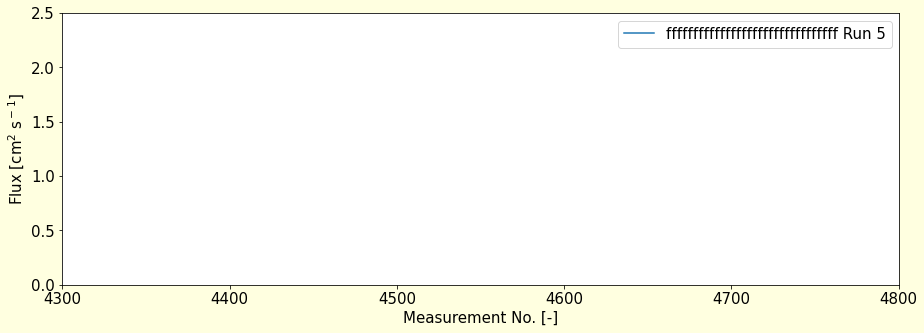

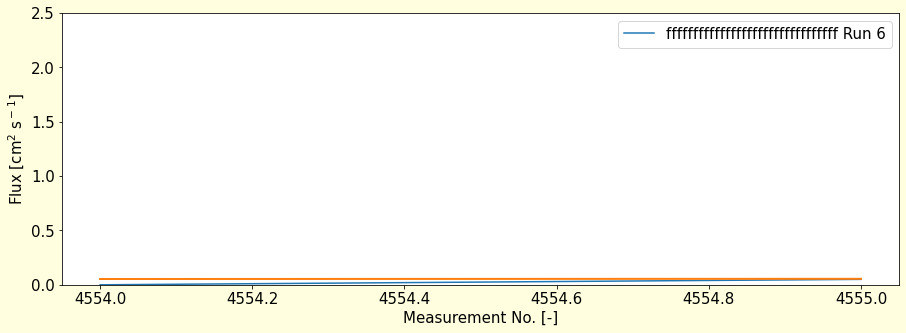

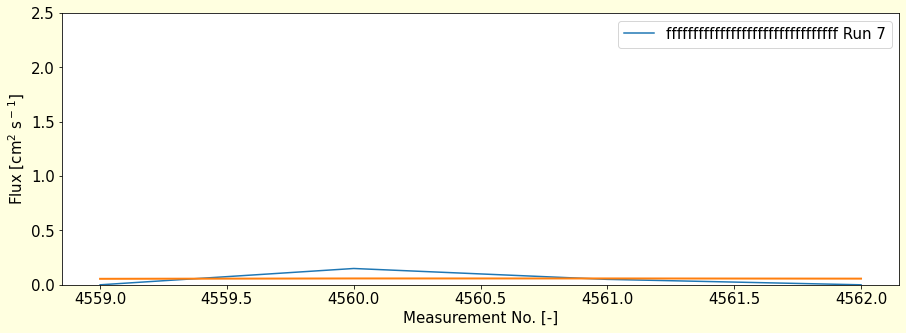

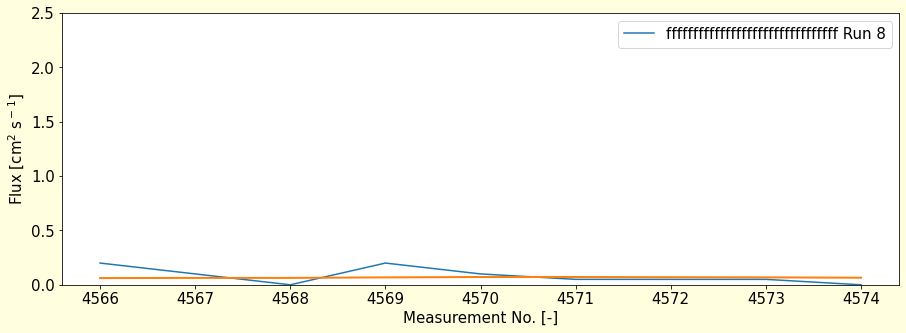

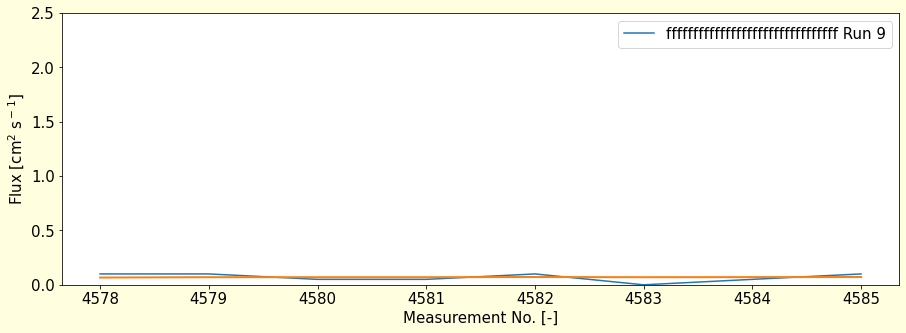

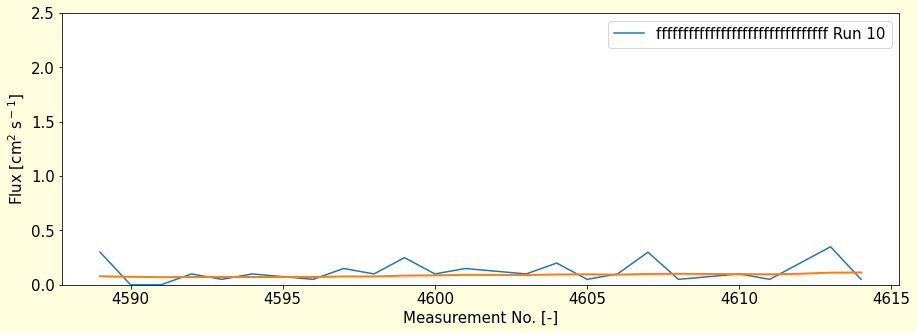

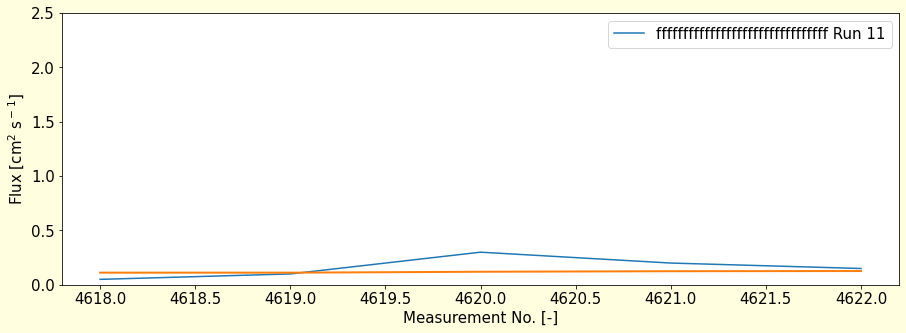

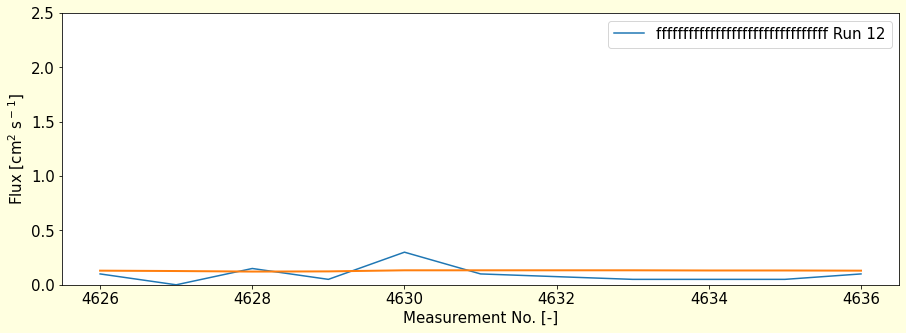

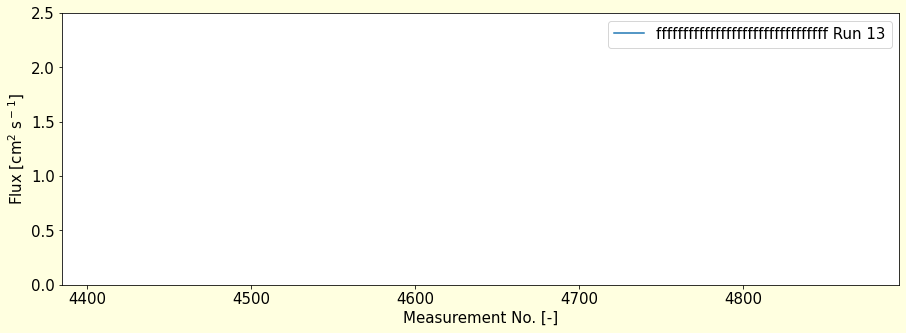

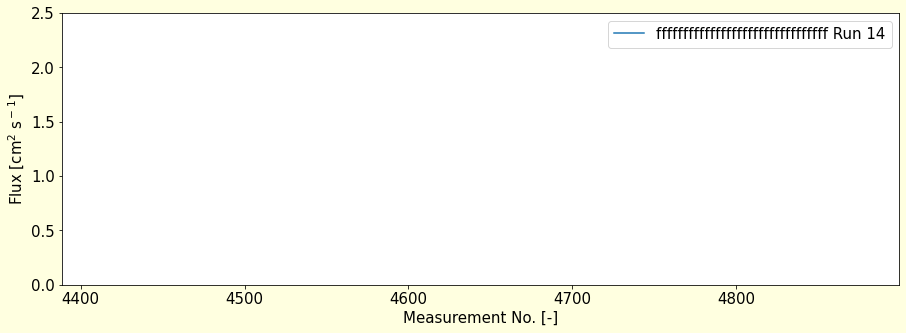

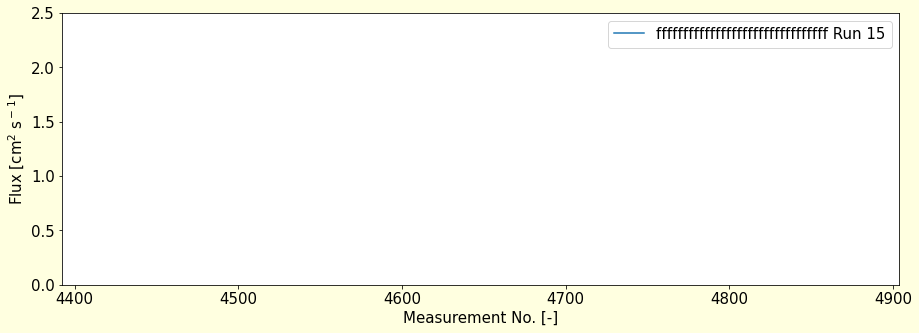

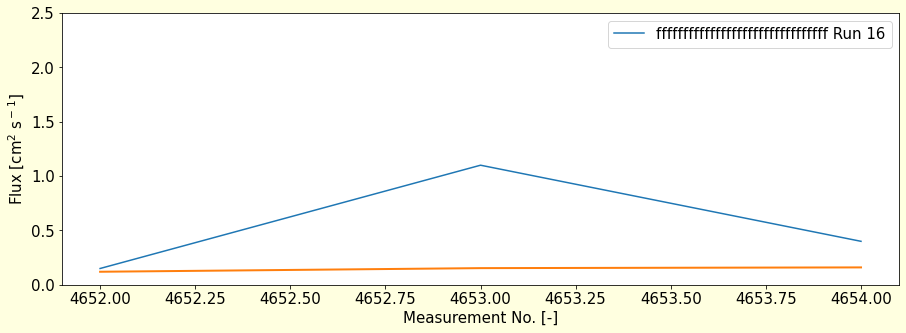

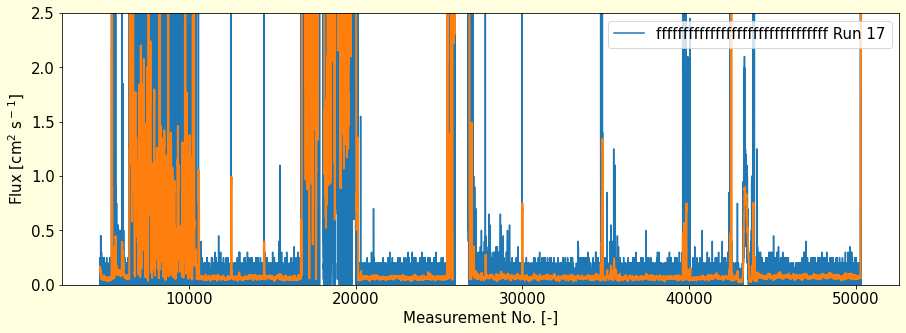

In [192]:
df['sum'] = df.iloc[:,FIRST_CHANNEL:1028].sum(axis=1)
df['mean'] = df['sum'].rolling(30).mean()

matplotlib.rcParams.update({'font.size': 15})

for r in range(0,run):
    plt.figure(figsize=(15,5), facecolor='lightyellow')
    plt.plot(df.loc[df['run']==r]['sum']/20, label=sn+' Run '+str(r))
    plt.plot(df.loc[df['run']==r]['mean']/20, lw=2)
    plt.ylim(0,2.5)
    plt.xlabel('Measurement No. [-]')
    plt.ylabel('Flux [cm$^2$ s$^-$$^1$]')
    plt.legend(loc=1)
    plt.show()


0.039 0.0078


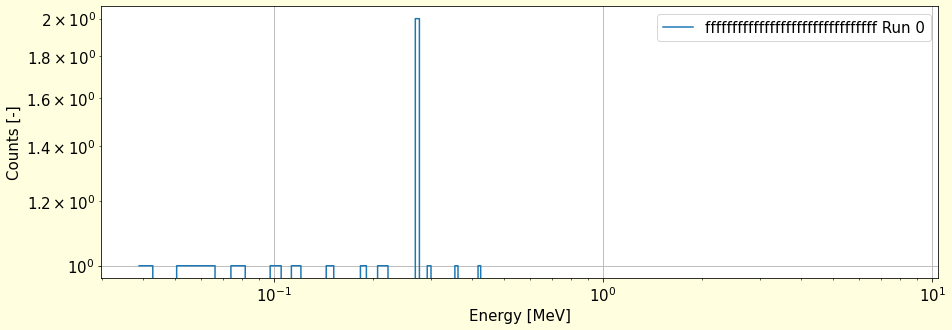

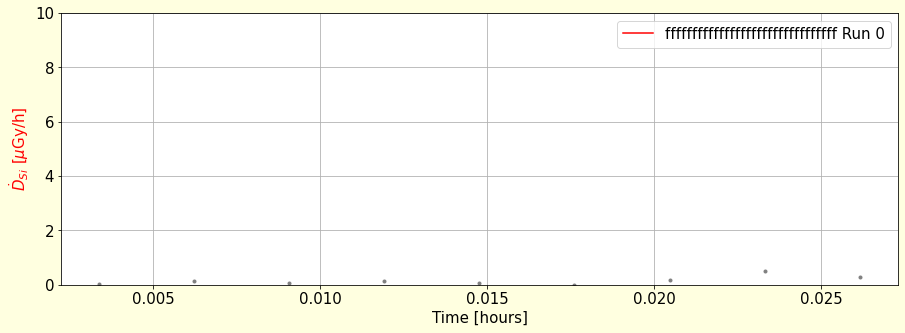

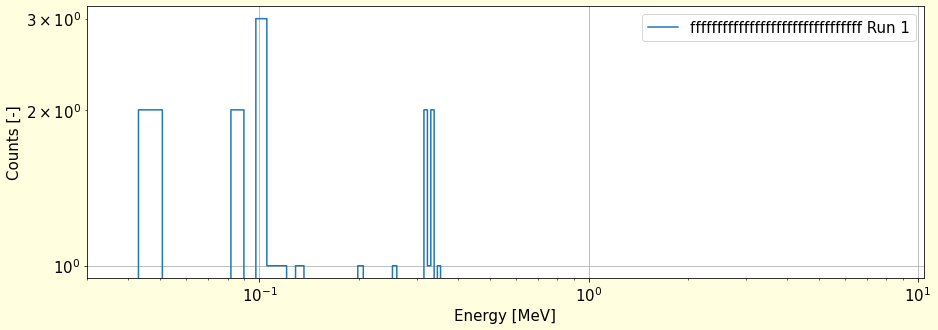

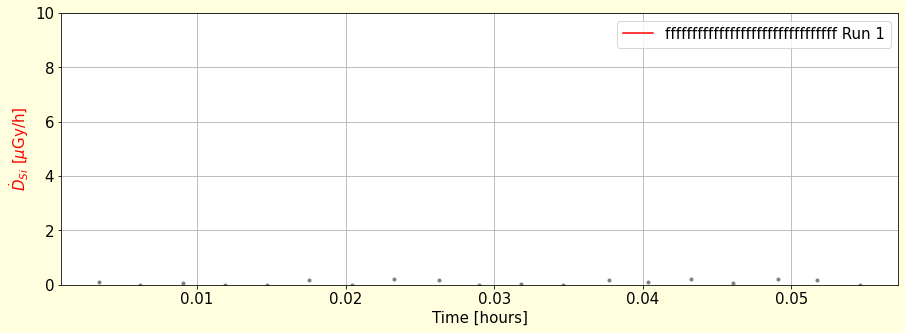

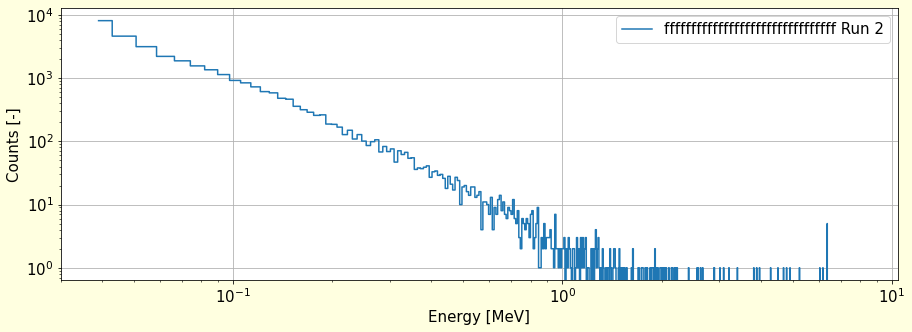

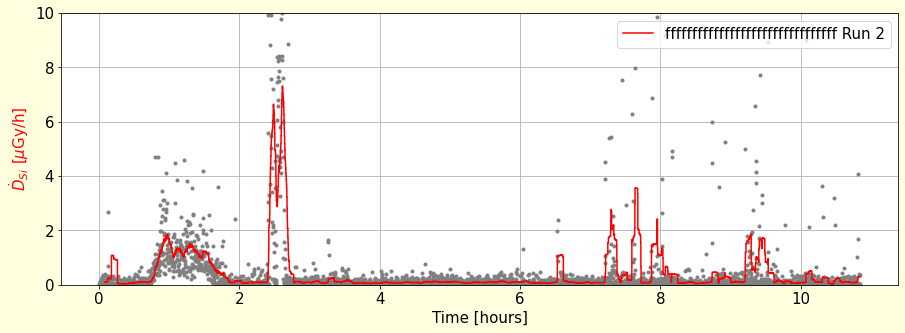

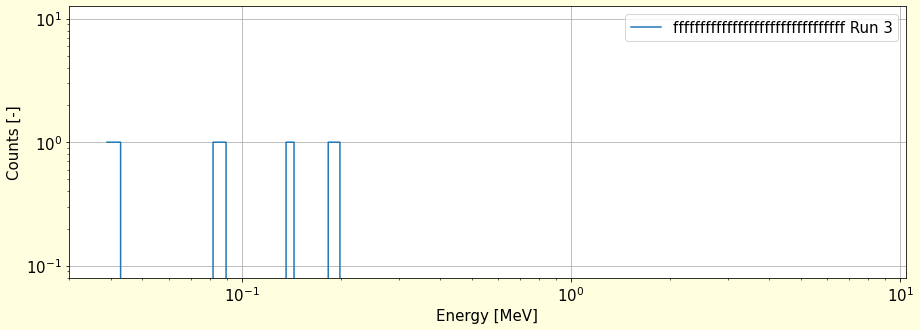

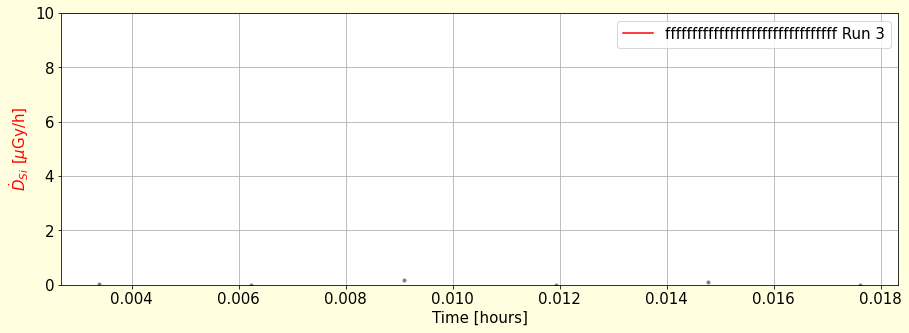

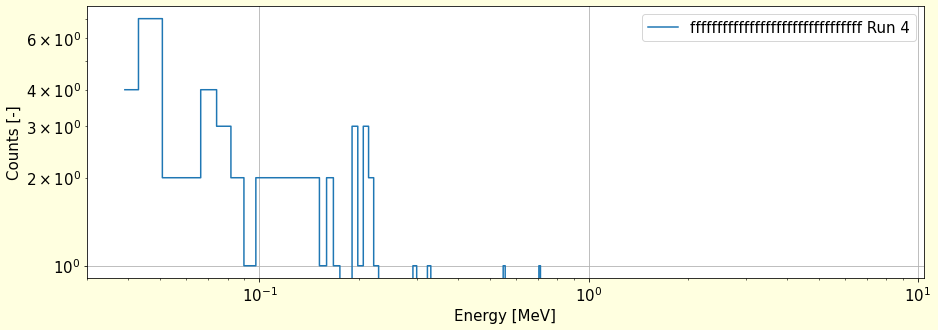

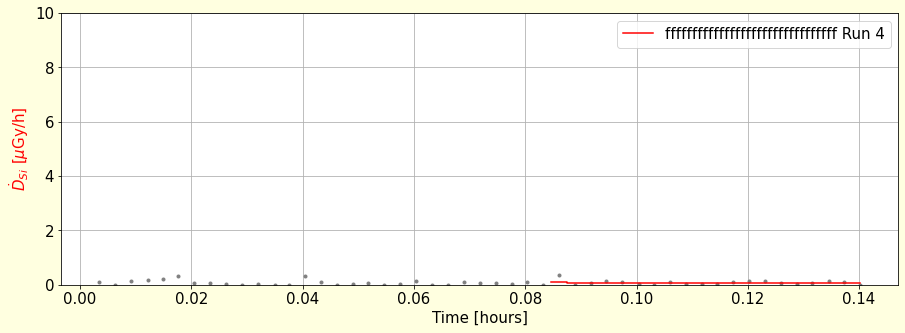

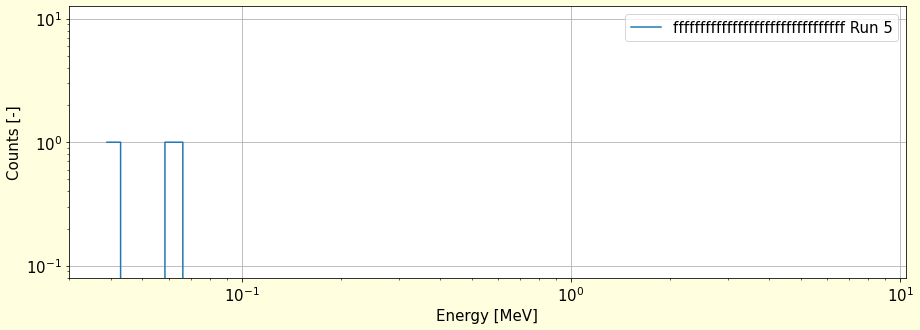

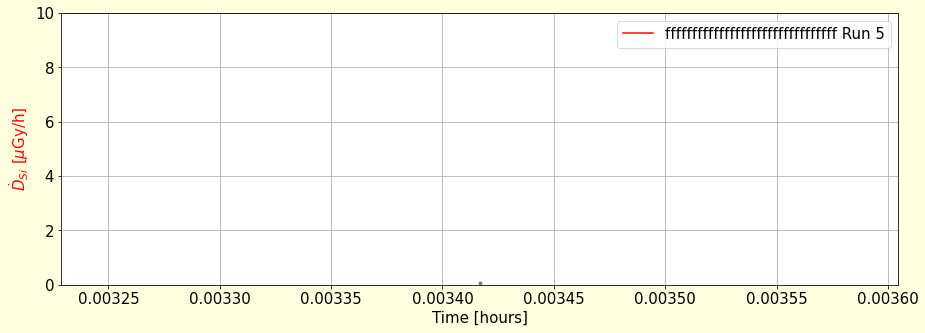

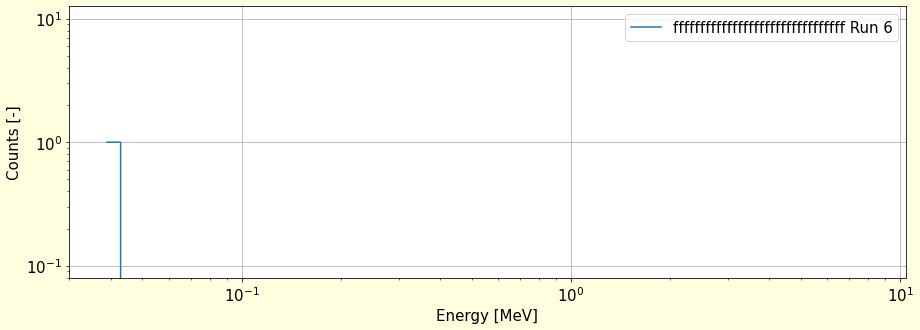

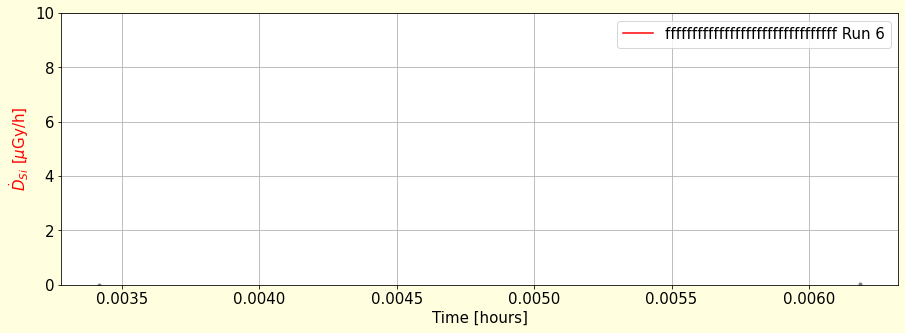

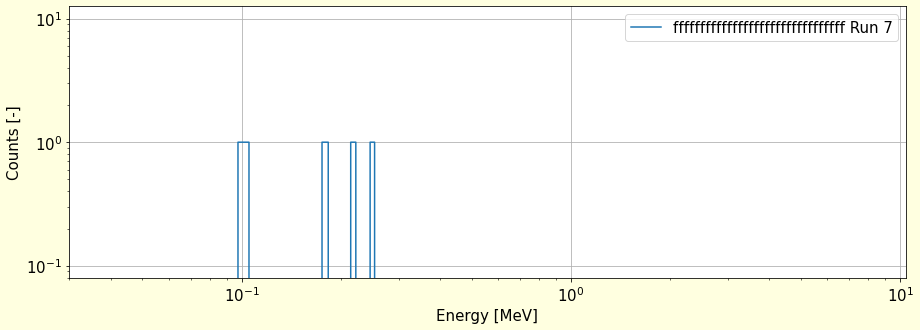

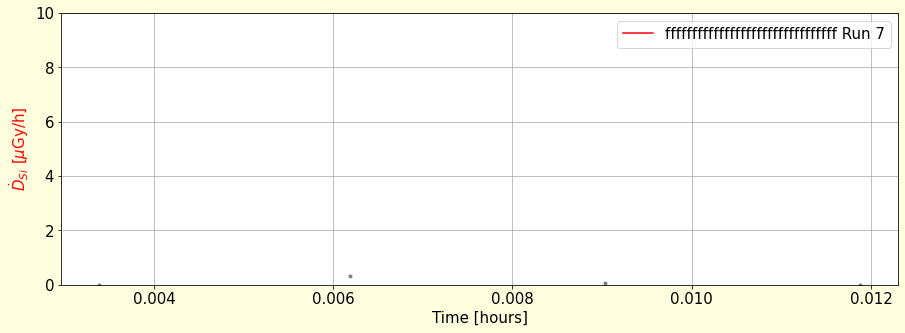

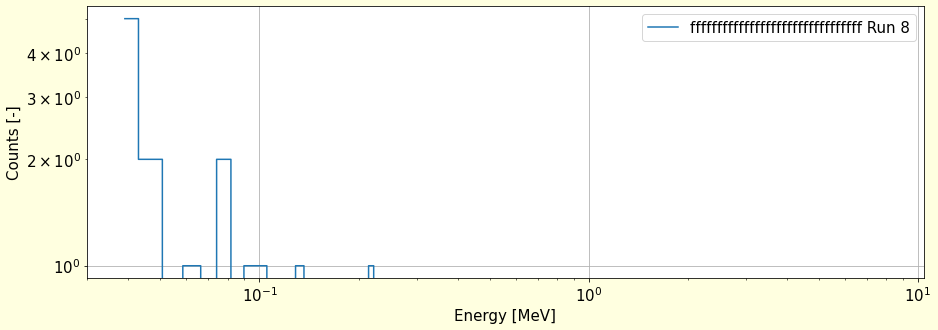

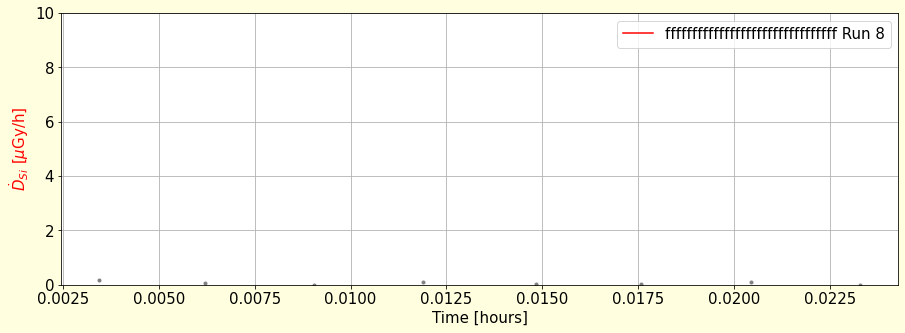

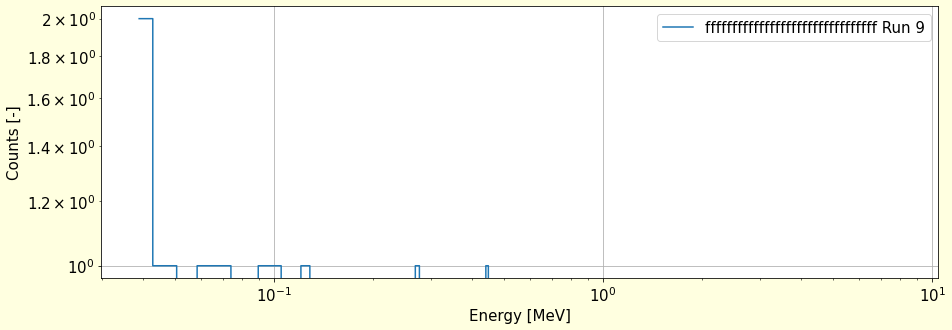

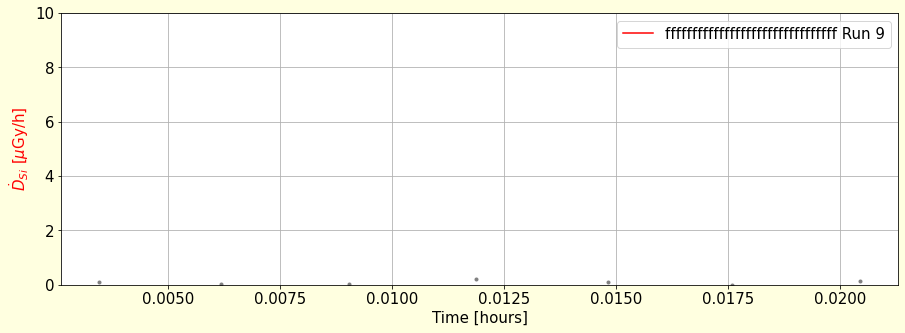

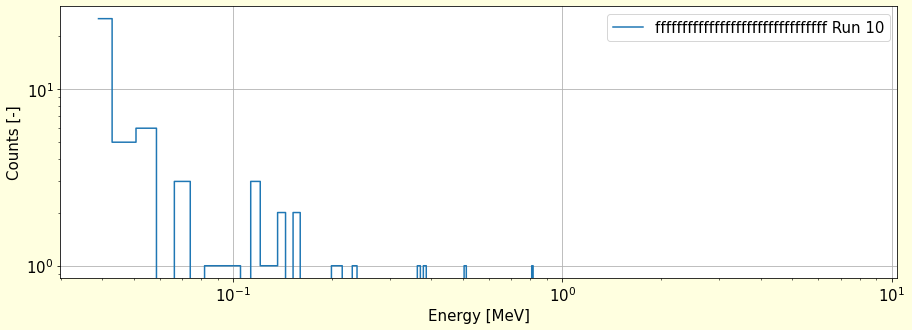

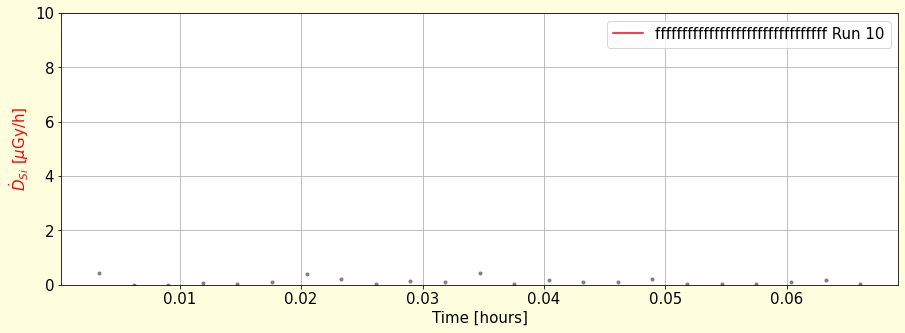

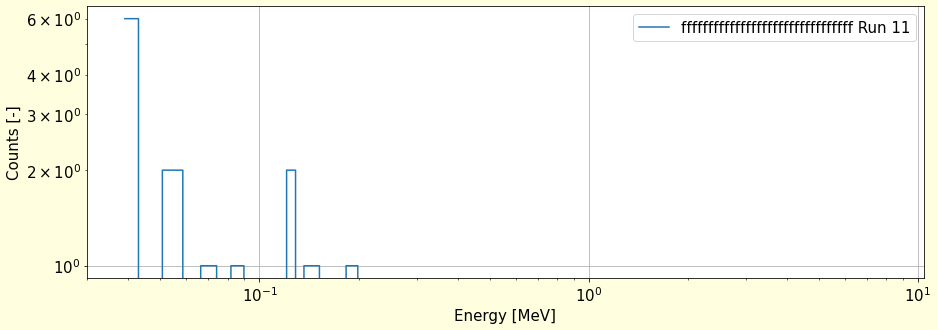

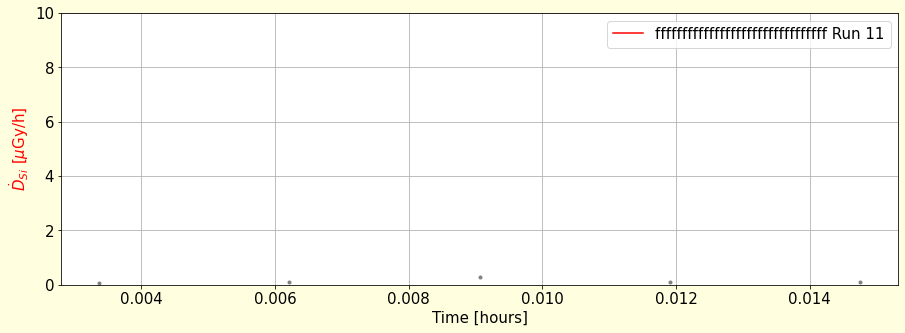

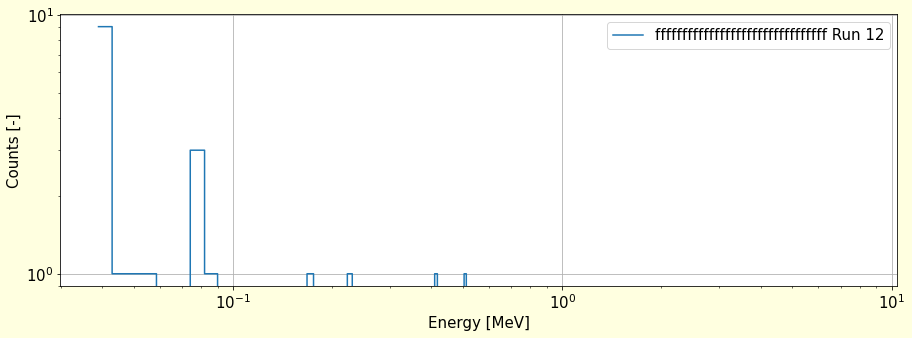

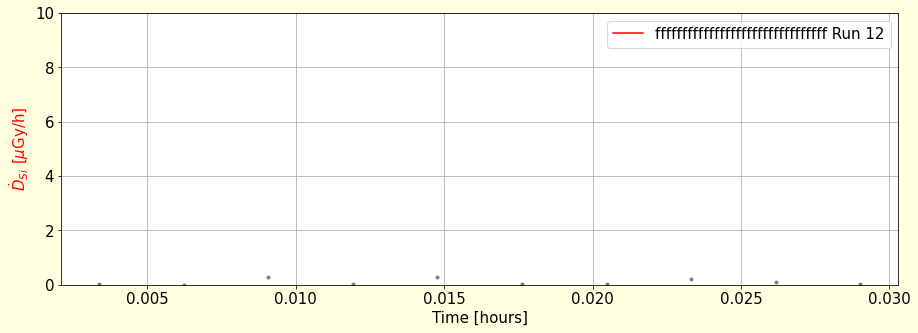

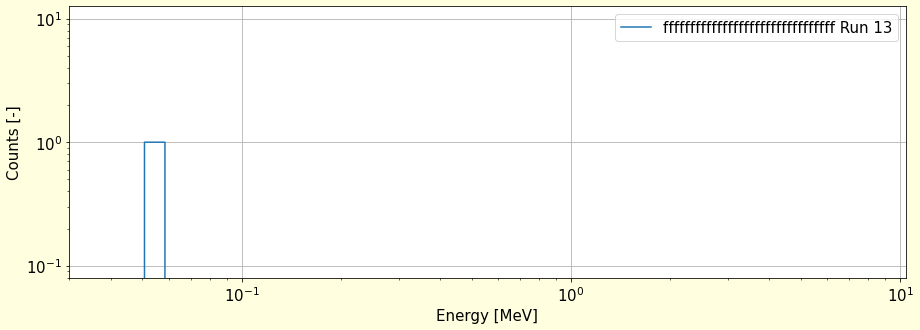

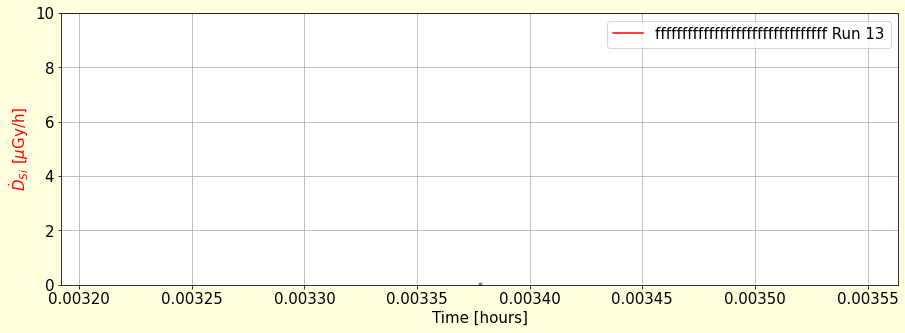

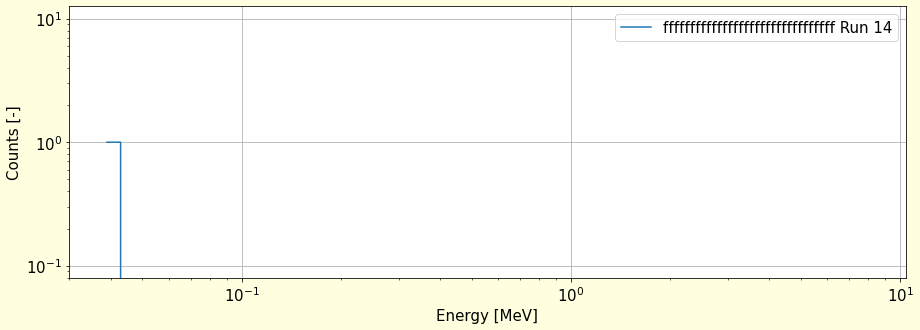

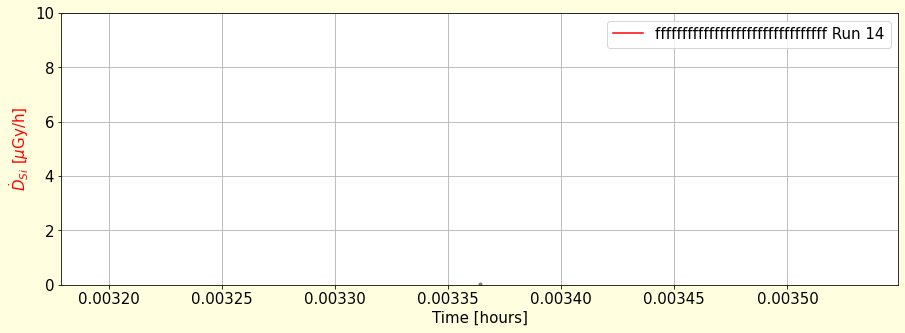

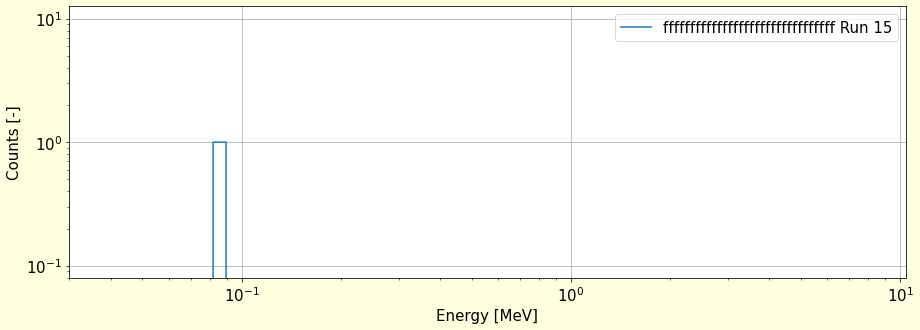

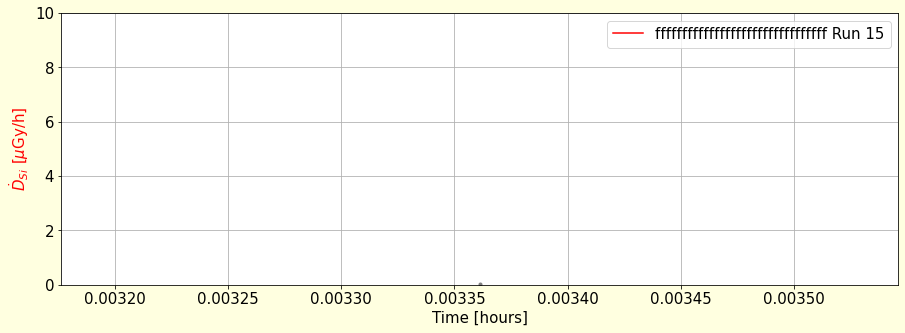

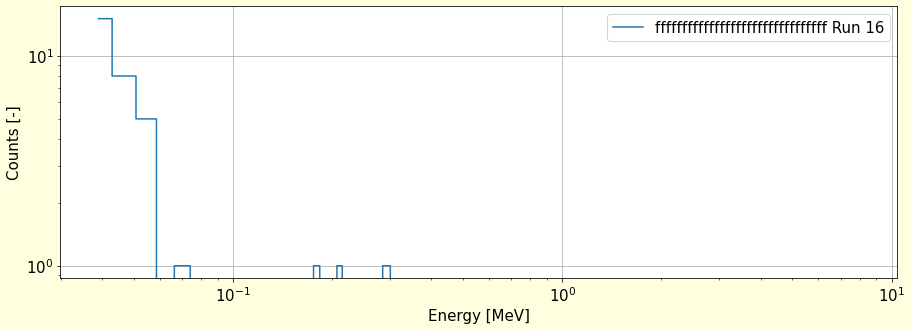

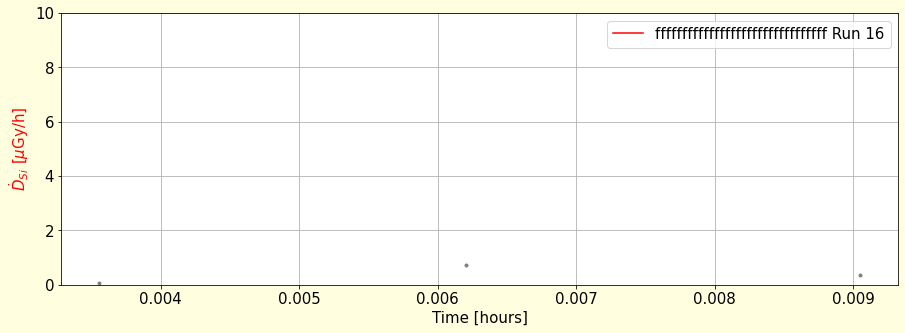

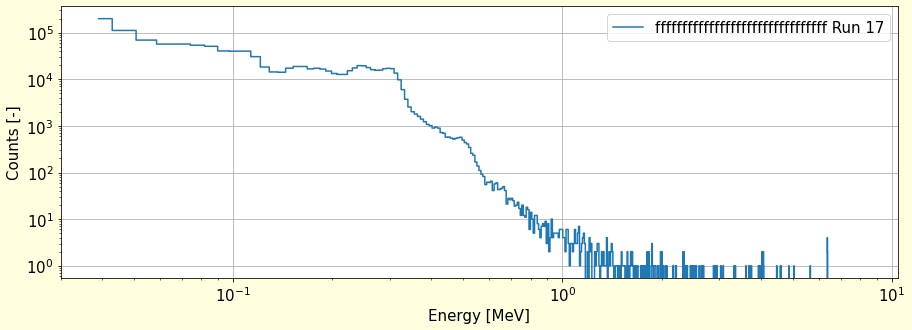

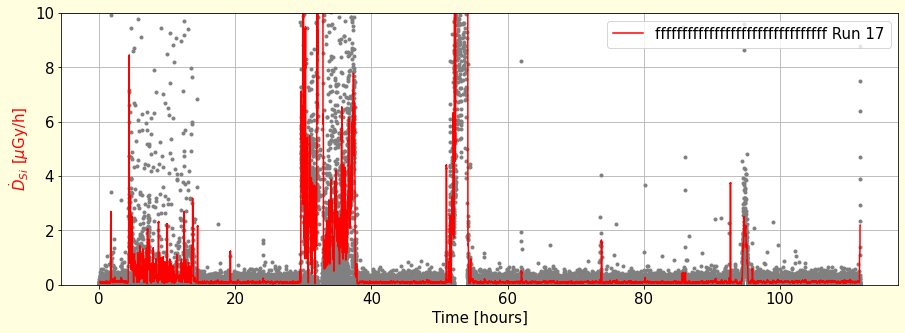

In [193]:
coef = np.array([0.,0.])
coef[1] = CH_WIDTH
coef[0] = CH_WIDTH*(FIRST_CHANNEL-ZERO_CHANNEL+1)
print(coef[0], coef[1])

for r in range(0,run):
    rc = df.loc[df['run']==r].copy()
    rc[2] = pd.to_numeric(rc[2], errors='coerce')

    plt.figure(figsize=(15,5), facecolor='lightyellow')
    matplotlib.rcParams.update({'font.size': 15})

    ener = rc.iloc[:,FIRST_CHANNEL:1028].sum()
    
    e = pd.DataFrame()
    e['1'] = ener
    e['i'] = ener.index
    e['x'] = (e['i'].astype(float)-FIRST_CHANNEL) * coef[1] + coef[0]

    plt.plot(e['x'], e['1'], drawstyle='steps-mid', label=sn+' Run '+str(r))

    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('Energy [MeV]')
    plt.ylabel('Counts [-]')
    plt.grid()

    plt.legend()
    plt.show()
    
    
    rc['ener'] = (np.asarray(rc.iloc[:,FIRST_CHANNEL:1028]) * np.asarray(e['x'])).sum(axis=1)    
    
    # size of the chip (20 mm · 10 mm), 
    # the thickness of the depletion layer (0.3 mm), 
    # and the density of silicon (2.33 g cm^3)
    # 0.1165e-3 kg
    rc['dsi'] = ((1e6 * (1.602e-19 * rc['ener'] * 1e6)/0.1165e-3)/10) * 3600 # in uGy/h

    rc['dsimean'] = rc['dsi'].rolling(30).mean()

    plt.figure(figsize=(15,5), facecolor='lightyellow')
    matplotlib.rcParams.update({'font.size': 15})
    plt.plot(rc[2]/3600,rc['dsi'], c='gray', linestyle='', marker='.')
    plt.plot(rc[2]/3600,rc['dsimean'],c='red', drawstyle='steps-mid', label=sn+' Run '+str(r))

    plt.ylim([0,10])

    plt.xlabel('Time [hours]')
    plt.ylabel(r'$\.D$$_S$$_i$ [$\mu$Gy/h]', color='red')
    plt.legend(loc=1)

    plt.grid()
    plt.show()


In [200]:
SELECTED_RUN = 17 # Measurement run (order of power on)
FROM = 94.2 # Start time in hour
TO = 95.5 # Stop time in hour

0.039 0.0078


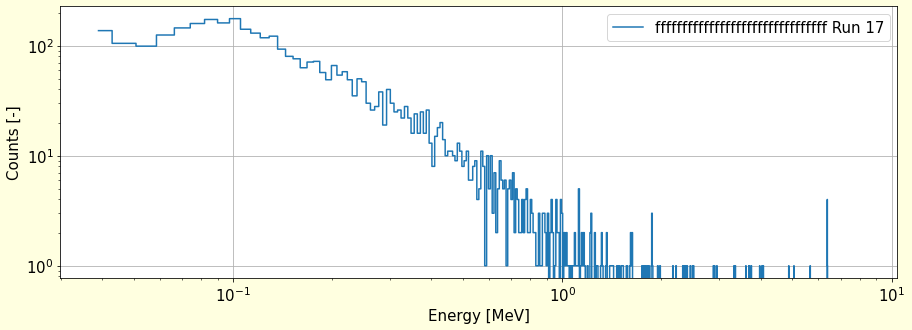

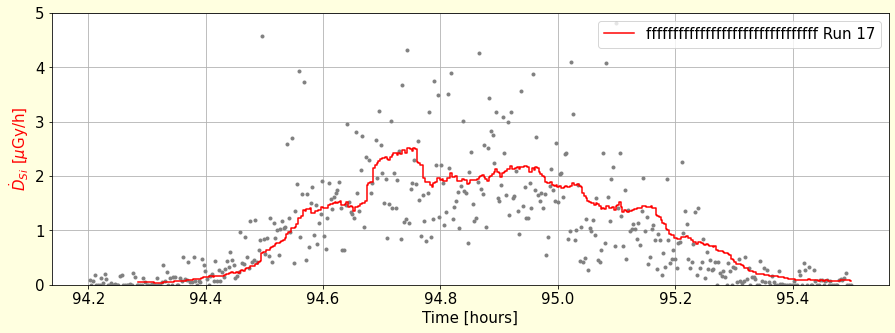

In [201]:
WINDOW = 30

coef = np.array([0.,0.])
coef[1] = CH_WIDTH
coef[0] = CH_WIDTH*(FIRST_CHANNEL-ZERO_CHANNEL+1)
print(coef[0], coef[1])

r = SELECTED_RUN
rc = df.loc[df['run']==SELECTED_RUN].loc[df[2]>=FROM*3600].loc[df[2]<=TO*3600].copy()
rc[2] = pd.to_numeric(rc[2], errors='coerce')

plt.figure(figsize=(15,5), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

ener = rc.iloc[:,FIRST_CHANNEL:1028].sum()

e = pd.DataFrame()
e['1'] = ener
e['i'] = ener.index
e['x'] = (e['i'].astype(float)-FIRST_CHANNEL) * coef[1] + coef[0]

plt.plot(e['x'], e['1'], drawstyle='steps-mid', label=sn+' Run '+str(r))

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy [MeV]')
plt.ylabel('Counts [-]')
plt.grid()

plt.legend()
plt.show()


rc['ener'] = (np.asarray(rc.iloc[:,FIRST_CHANNEL:1028]) * np.asarray(e['x'])).sum(axis=1)    

# size of the chip (20 mm · 10 mm), 
# the thickness of the depletion layer (0.3 mm), 
# and the density of silicon (2.33 g cm^3)
# 0.1165e-3 kg
rc['dsi'] = ((1e6 * (1.602e-19 * rc['ener'] * 1e6)/0.1165e-3)/10) * 3600 # in uGy/h

rc['dsimean'] = rc['dsi'].rolling(WINDOW).mean()

plt.figure(figsize=(15,5), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})
plt.plot(rc[2]/3600,rc['dsi'], c='gray', linestyle='', marker='.')
plt.plot(rc[2]/3600,rc['dsimean'],c='red', drawstyle='steps-mid', label=sn+' Run '+str(r))

plt.ylim([0,5])

plt.xlabel('Time [hours]')
plt.ylabel(r'$\.D$$_S$$_i$ [$\mu$Gy/h]', color='red')
plt.legend(loc=1)

plt.grid()
plt.show()


In [205]:
coef = np.array([0.,0.])
coef[1] = CH_WIDTH
coef[0] = CH_WIDTH*(FIRST_CHANNEL-ZERO_CHANNEL+1)
print('Min. sensitivity', coef[0], '[MeV], Channel width', coef[1], '[MeV]')

df[2] = pd.to_numeric(df[2], errors='coerce')
rc = df.loc[df['run']==SELECTED_RUN].loc[df[2]>=FROM*3600].loc[df[2]<=TO*3600].copy()

ener = rc.iloc[:,FIRST_CHANNEL:1028].sum()
e = pd.DataFrame()
e['1'] = ener
e['i'] = ener.index
e['x'] = (e['i'].astype(float)-FIRST_CHANNEL) * coef[1] + coef[0]
rc['ener'] = (np.asarray(rc.iloc[:,FIRST_CHANNEL:1028]) * np.asarray(e['x'])).sum(axis=1)    

# size of the chip (20 mm · 10 mm), 
# the thickness of the depletion layer (0.3 mm), 
# and the density of silicon (2.33 g cm^3)
# 0.1165e-3 kg
rc['dsi'] = ((1e6 * (1.602e-19 * rc['ener'] * 1e6)/0.1165e-3)/10) * 3600 # in uGy/h

print('S.N.',sn)
print('Run '+str(SELECTED_RUN),' From', FROM, '[hour] to', TO, '[hour], Duration', round(TO-FROM,1),'[hour]')
mean_doserate = rc.loc[rc[2]>=FROM*3600].loc[rc[2]<=TO*3600]['dsi'].mean()
print('Mean Dose Rate\033[1m',round(mean_doserate,2),'\033[0m[μGy/h]')
print('Dose in silicon\033[1m',round(mean_doserate * (TO-FROM),2),'±',round(3*rc.loc[rc[2]>=FROM*3600].loc[rc[2]<=TO*3600]['dsi'].sem(),2),'\033[0m[μGy]')

Min. sensitivity 0.039 [MeV], Channel width 0.0078 [MeV]
S.N. ffffffffffffffffffffffffffffffff
Run 17  From 94.2 [hour] to 95.5 [hour], Duration 1.3 [hour]
Mean Dose Rate 1.02 [μGy/h]
Dose in silicon 1.33 ± 0.16 [μGy]
